## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

In [2]:
import warnings

# Customize how warnings are displayed
warnings.filterwarnings('always', module='.*')
warnings.formatwarning = lambda message, category, filename, lineno, line=None: f'{category.__name__}: {message}\n'

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [6]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_data[
    ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace('0',np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

In [7]:
# Function to create boxplots grid
def plot_histplots_grid(df):
    from itertools import cycle
    import seaborn as sns
    import matplotlib.pyplot as plt

    n_data_cols=len(df.columns)

    n_cols=int(n_data_cols**.5)
    n_rows=0
    while n_rows*n_cols<n_data_cols:
        n_rows+=1
        
    # Create the figure and axes grid
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(int(20*n_data_cols/9),12))
    
    # Flatten the axs array for easier iteration
    axs = axs.flatten()

    # Create a cycler to iterate over the DataFrame columns
    cycler = cycle(df.columns)

    # Loop through the axes and plot histograms
    for i,ax in enumerate(axs):
        if i==n_data_cols:
            ax.set_visible(False)  # Hide any extra subplots if there are more subplots than columns
            break
        col = next(cycler)  # Get the next column name
        sns.histplot(data=df, x=col, ax=ax)  # Plot the histogram on the current axis
        ax.set_title(f"Histogram of {col}")  # Set the title for each subplot

    plt.tight_layout()
    plt.show()

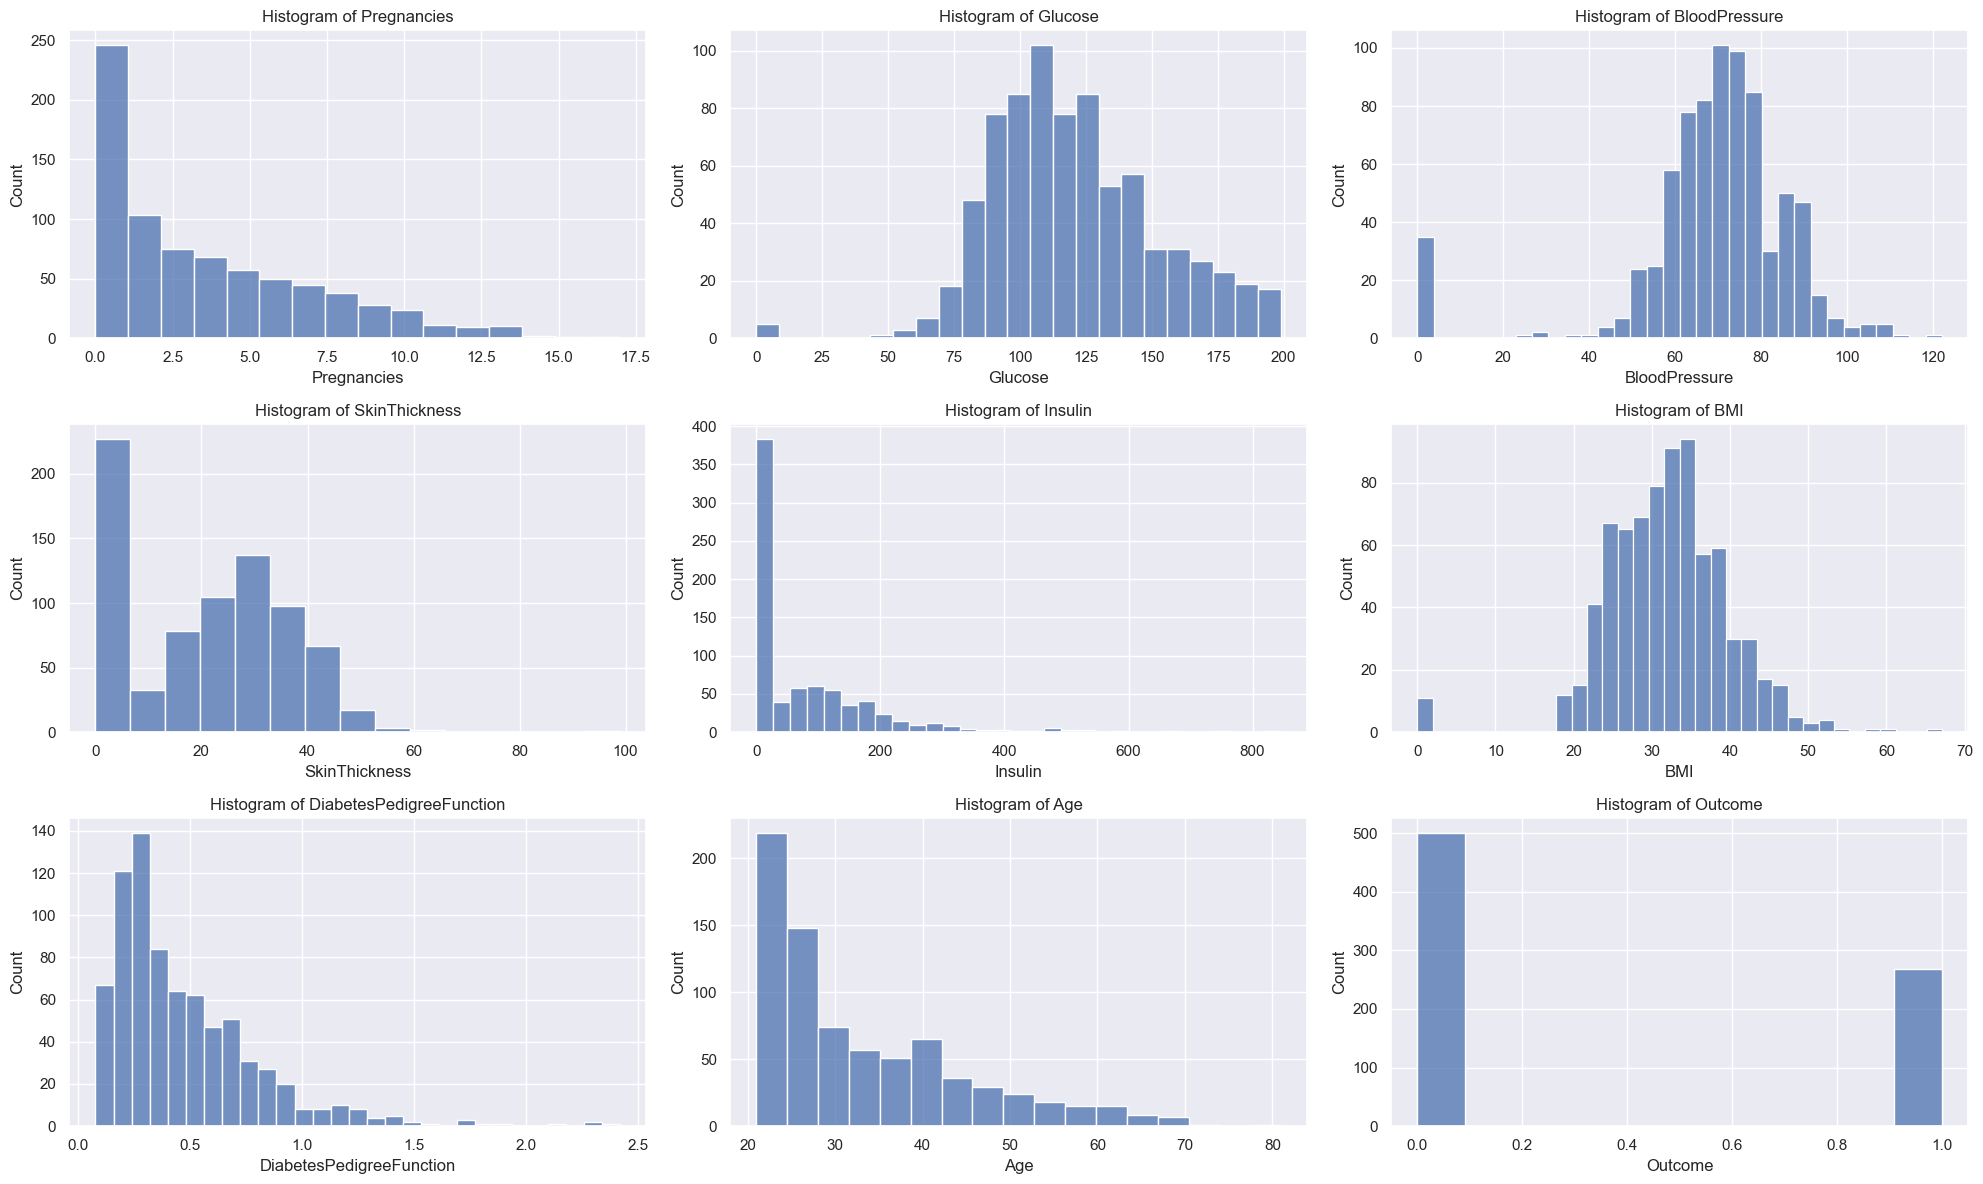

In [8]:
plot_histplots_grid(diabetes_data)

#### Replace the zeros with mean and median values.

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

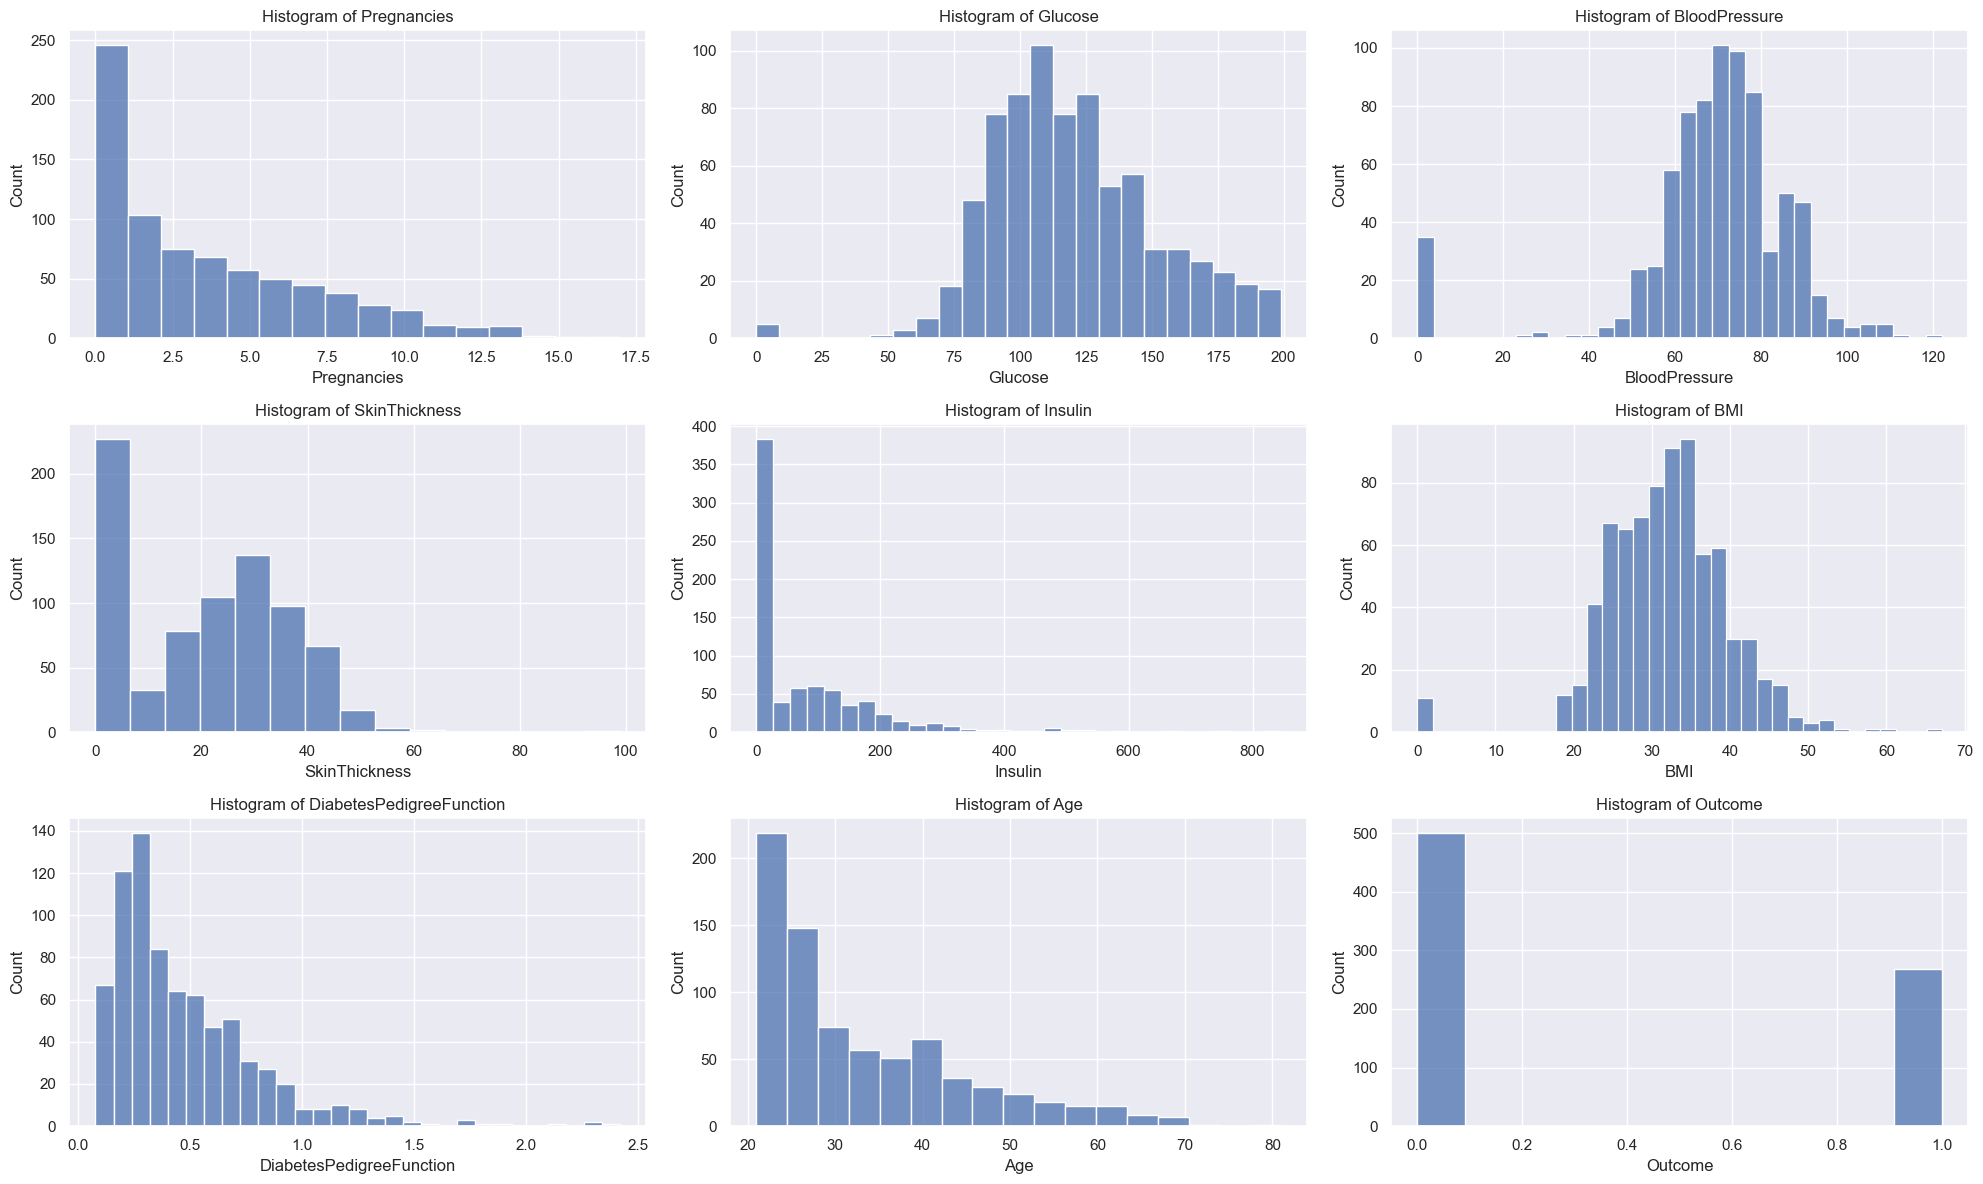

In [10]:
plot_histplots_grid(diabetes_data)

#### Plot the correlation matrix heatmap

Correlation between various features


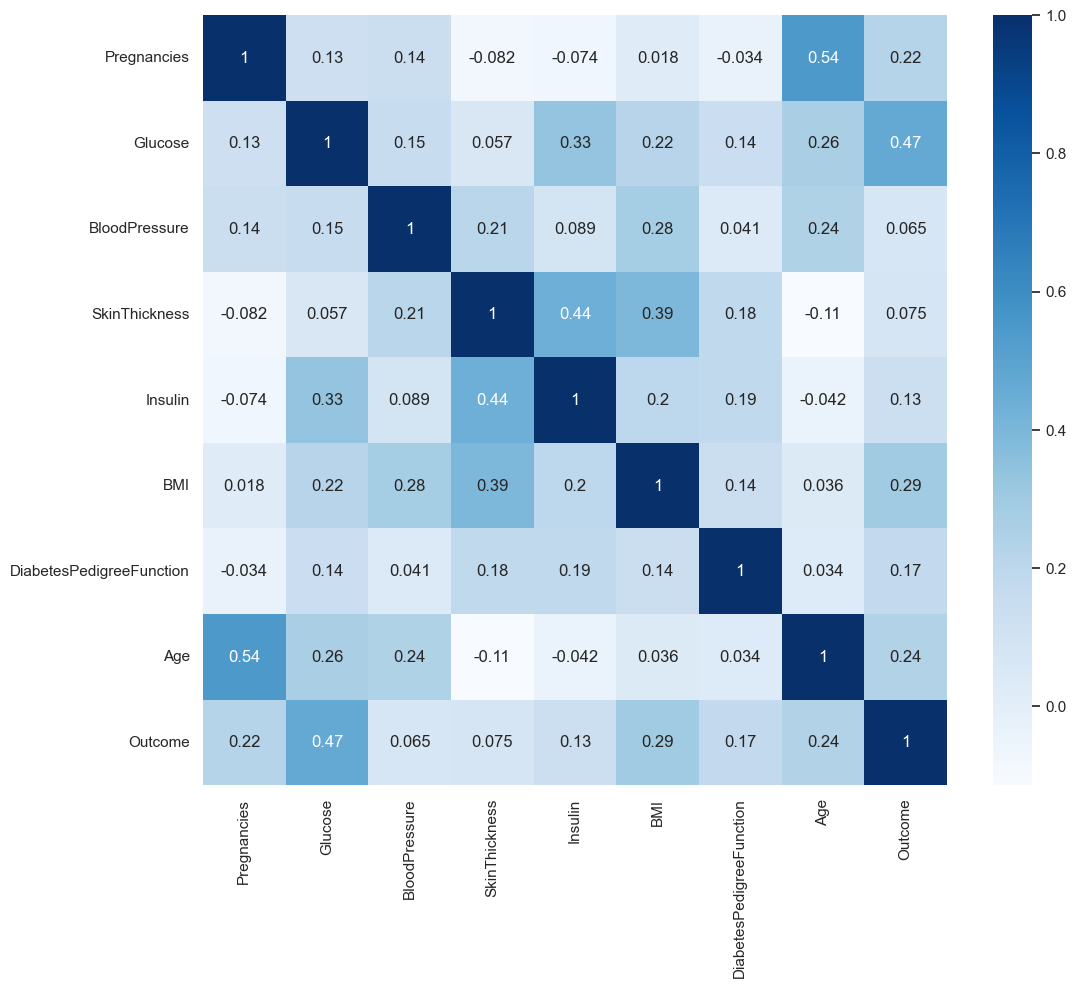

In [11]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [12]:
non_outcome_cols=[col for col in diabetes_data.columns if 'Outcome' !=col]
X=diabetes_data[non_outcome_cols]
y=diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV,ParameterGrid

scaler=StandardScaler()
scaler.fit(X_train)
X_train,X_test=scaler.transform(X_train),scaler.transform(X_test)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [15]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = {}
train_scores = {}

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores[i]=knn.score(X_train,y_train)
    test_scores[i]=knn.score(X_test,y_test)

score_df=pd.DataFrame({'Train Score':train_scores.values(),'Test Score':test_scores.values()},index=train_scores.keys()).rename_axis(index='N_value')

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [16]:
print(score_df)


         Train Score  Test Score
N_value                         
1           1.000000    0.630208
2           0.854167    0.656250
3           0.864583    0.697917
4           0.817708    0.697917
5           0.833333    0.682292
6           0.819444    0.687500
7           0.809028    0.697917
8           0.803819    0.677083
9           0.815972    0.677083


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [17]:
print(score_df.sort_values(by='Train Score',ascending=False)['Train Score'])

N_value
1    1.000000
3    0.864583
2    0.854167
5    0.833333
6    0.819444
4    0.817708
9    0.815972
7    0.809028
8    0.803819
Name: Train Score, dtype: float64


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [18]:
print(score_df.sort_values(by='Test Score',ascending=False)['Test Score'])

N_value
3    0.697917
4    0.697917
7    0.697917
6    0.687500
5    0.682292
8    0.677083
9    0.677083
2    0.656250
1    0.630208
Name: Test Score, dtype: float64


In [19]:
train_scores=score_df['Train Score'].tolist()
test_scores=score_df['Test Score'].tolist()

Plot the train and test model performance by number of neighbors.

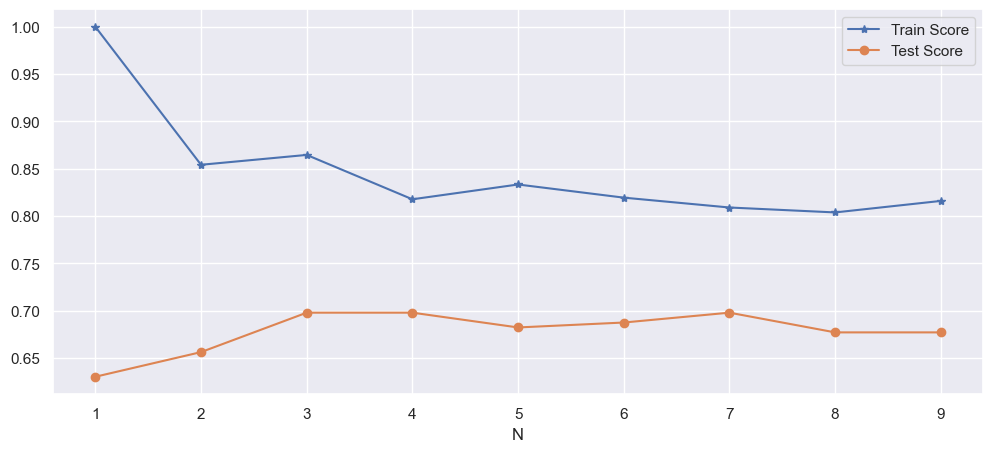

In [20]:
plt.figure(figsize=(12,5))
p = plt.plot(range(1,10),train_scores,marker='*',label='Train Score')
p = plt.plot(range(1,10),test_scores,marker='o',label='Test Score')
plt.legend()
plt.xlabel('N')
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
best_n=score_df.sort_values(by='Test Score',ascending=False).index[0]
knn = KNeighborsClassifier(best_n)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

Text(0.5, 20.049999999999997, 'Predicted label')

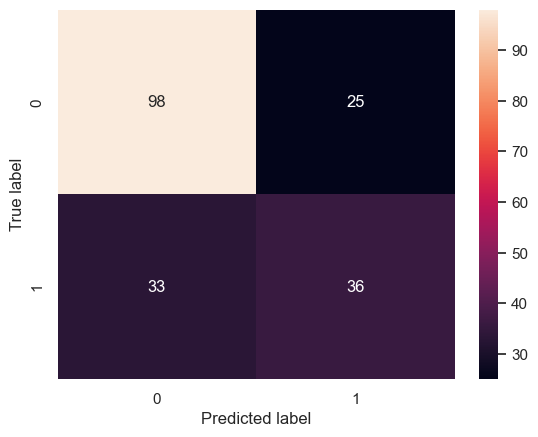

In [23]:
sns.heatmap(pl,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

**<font color='teal'> Print the classification report </font>**

In [24]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T

,precision,recall,f1-score,support
0,0.748092,0.796748,0.771654,123.000000
1,0.590164,0.521739,0.553846,69.000000
accuracy,0.697917,0.697917,0.697917,0.697917
macro avg,0.669128,0.659244,0.662750,192.000000
weighted avg,0.691336,0.697917,0.693379,192.000000


#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [26]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578558696205755
Best Parameters: {'n_neighbors': 14}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [27]:
from sklearn.ensemble import RandomForestClassifier

steps=[('Scaler',StandardScaler()),('Model',RandomForestClassifier())]
params = {'Model__n_estimators':[1,10,100,200],'Model__max_depth':[1,5,10]}

pipeline=Pipeline(steps)
cross_val=GridSearchCV(estimator=pipeline,param_grid=params,cv=5)
cross_val.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('Model', RandomForestClassifier())]),
             param_grid={'Model__max_depth': [1, 5, 10],
                         'Model__n_estimators': [1, 10, 100, 200]})

In [28]:
cross_val.best_estimator_,cross_val.best_params_,cross_val.best_score_

(Pipeline(steps=[('Scaler', StandardScaler()),
                 ('Model',
                  RandomForestClassifier(max_depth=5, n_estimators=200))]),
 {'Model__max_depth': 5, 'Model__n_estimators': 200},
 0.7690854572713642)

In [29]:
y_pred = cross_val.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

Text(0.5, 20.049999999999997, 'Predicted label')

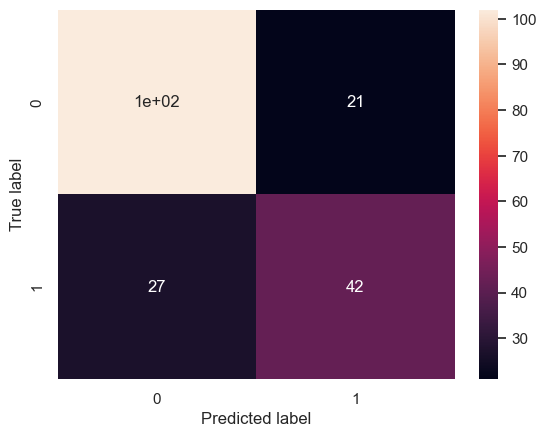

In [30]:
sns.heatmap(pl,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

**<font color='teal'> Print the classification report </font>**

In [31]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T

,precision,recall,f1-score,support
0,0.790698,0.829268,0.809524,123.00
1,0.666667,0.608696,0.636364,69.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.728682,0.718982,0.722944,192.00
weighted avg,0.746124,0.750000,0.747294,192.00


<b> Observations: Based on the confusion matrix and classification report, the optimized Random Forest Classifier gives a better performance than K-means </b>